We have a few elements that can be useful. Word counts, average word length, parts of speech, and the content of the review. 

Let's see which words are associated with each game.

we can group vectors by week or month... we can get bi and trigrams counts for each month.



In [84]:
# Load com.miHoYo.GenshinImpact

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google_play_scraper import app, Sort, reviews_all, permissions

from os import listdir, path
from os.path import isfile, join
import pickle
from collections import Counter

# import these modules
import nltk
from nltk.corpus import stopwords
nltk.data.path.append('/tf/school/Capstone')
nltk.download('wordnet', download_dir='/tf/school/Capstone')
nltk.download('omw-1.4', download_dir='/tf/school/Capstone')
nltk.download('stopwords', download_dir='/tf/school/Capstone')
from nltk.stem import WordNetLemmatizer

my_stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


import commonFunctions as cf

import re


def getReviewsDf(app_id = None):
    mypath = 'sentReviews/'
    reviews_df = None
    if path.exists(mypath + app_id):
        reviews_df = pd.read_pickle(mypath + app_id, compression='gzip')

    return reviews_df

# reviews_df = getReviewsDf('com.YoStarEN.Arknights.pkl')

reviews_df = cf.getReviewsDf()

display(reviews_df.columns)
print(len(reviews_df))
# Let's remove some elements that won't help us that much this includes foreign languages...
reviews_df = reviews_df[reviews_df['review_average_word_len'] < 15]

# remove reviews that don't have the POS tags
tempCols = ['NN','NNS','NNP','NNPS','VB','VBG','VBD','VBN','VBP','VBZ','JJ','JJR','JJS']

reviews_df['sum'] = reviews_df[tempCols].sum(axis=1)
reviews_df = reviews_df[reviews_df['sum'] > 0]

print(len(reviews_df))

reviews_df.head()

[nltk_data] Downloading package wordnet to /tf/school/Capstone...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /tf/school/Capstone...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /tf/school/Capstone...
[nltk_data]   Package stopwords is already up-to-date!


Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'at',
       'title', 'description', 'summary', 'size', 'developer', 'contentRating',
       'updated', 'released', 'appId', 'sentiment', 'review_word_count',
       'review_average_word_len', 'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBG',
       'VBD', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'],
      dtype='object')

2461319
1503346


,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VB,VBG,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,Fun. Strategic. Nice art. But most importantly...,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,3
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,Hardest game i ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,2
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,"most rewarding for rewards and gacha, immersiv...",5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,0,0,4,0,0,13
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,"For F2P players and weebs here, this is a game...",5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,4,5,5,0,0,41
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,Strategy rpg × tower defence blended to perfec...,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,4


In [85]:
# we can preprocess some text...

reviews_df['content']=reviews_df['content'].str.lower()

# remove extra whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())


def remove_puncuation(text):
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    return re.sub('['+my_punctuation + ']+', '', text) # strip punctuation

def remove_numbers(text):
    return re.sub('([0-9]+)', '', text) # remove numbers

def remove_stopwords(text):
     return " ".join([word for word in text.split(' ')
                            if word not in my_stopwords]) # remove stopwords
def lemmatize_stemming(text):
    return word_rooter(WordNetLemmatizer().lemmatize(text, pos='v'))


reviews_df['content']=reviews_df['content'].apply(lambda x: remove_whitespace(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_puncuation(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_numbers(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_stopwords(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: lemmatize_stemming(x))




from nltk import word_tokenize

# reviews_df['content']=reviews_df['content'].apply(lambda X: word_tokenize(X))

In [86]:
reviews_df.head()

,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VB,VBG,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,fun strategic nice art importantly fun,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,3
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,hardest game ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,2
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,rewarding rewards gacha immersive content char...,5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,0,0,4,0,0,13
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,fp players weebs game fits especially ones lov...,5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,4,5,5,0,0,41
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,strategy rpg × tower defence blended perfect,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,4


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

documents = reviews_df['content']


# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=10, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, min_df=10, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Let's try again...
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24


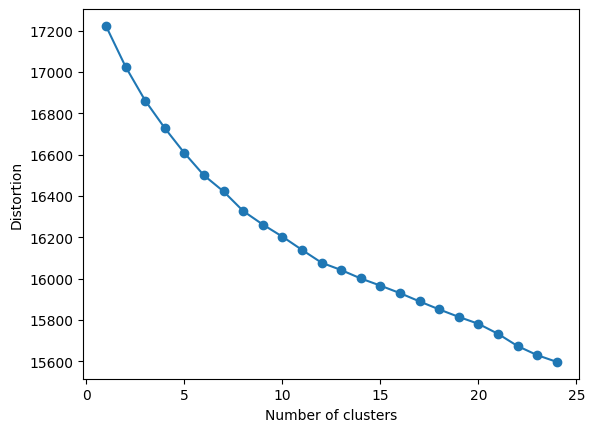

In [34]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import NMF, LatentDirichletAllocation


X = tfidf
distortions = []

for i in range(1, 25):
#     lda = LatentDirichletAllocation(n_topics=i, max_iter=5,
#                                     learning_method='online', 
#                                     learning_offset=50.,
#                                     random_state=0).fit(tf)

    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

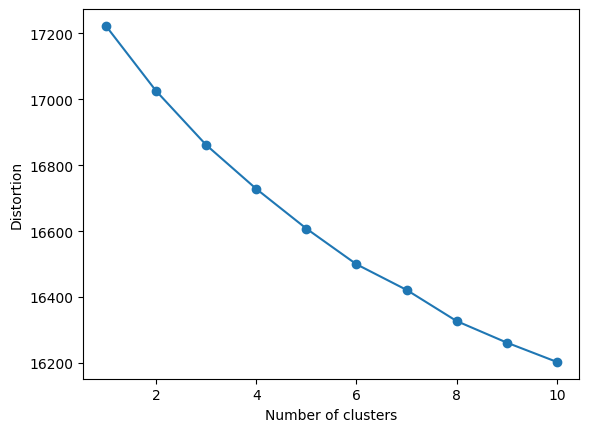

In [36]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans
import numpy as np


X = tfidf
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [53]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=7, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

reviews_df['cluster'] = y_km

In [54]:
reviews_df.head()

,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VBG,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum,cluster
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,fun strategic nice art importantly fun,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,3,2
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,hardest game ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,2,2
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,rewarding rewards gacha immersive content char...,5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,4,0,0,13,5
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,fp players weebs game fits especially ones lov...,5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,4,5,5,0,0,41,2
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,strategy rpg × tower defence blended perfect,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,4,0


In [55]:
reviews_df[['score','cluster']].groupby('cluster').mean().reset_index()

,cluster,score
0,0,4.545232
1,1,4.828846
2,2,3.858197
3,3,4.956973
4,4,4.461972
5,5,4.563888
6,6,4.512554


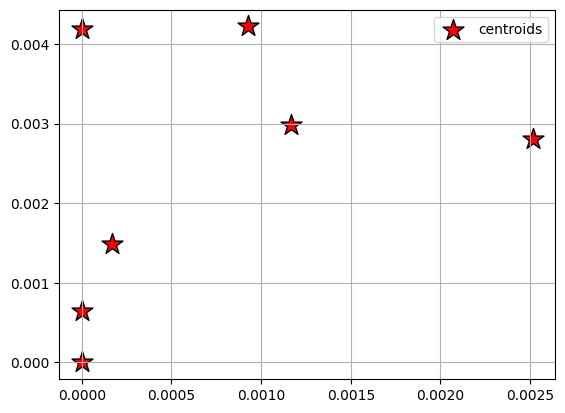

In [56]:
# plt.scatter(
#     X[y_km == 0, 0], X[y_km == 0, 1],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     X[y_km == 1, 0], X[y_km == 1, 1],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     X[y_km == 2, 0], X[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [66]:
#NOTE: we have to plot the number of the cluster somehow. We don't know 0,0 is cluster 0

# to me it looks like there might be 5 groups not the 7. The three in the bottom left appear pretty close and what is the 0,0 position?
# before we get too far we need to know what this 0,0 is. It's possible we need to remove that if it is dirty data.

display(reviews_df['score'].mean())
display((reviews_df[reviews_df['cluster'] == 0])['score'].mean())
display((reviews_df[reviews_df['cluster'] == 0])['score'].values[:10])
display((reviews_df[reviews_df['cluster'] == 0])['sentiment'].values[:10])
(reviews_df[reviews_df['cluster'] == 0])['content'].values[:10]

4.177727598171504

4.54523227383863

array([5, 1, 5, 3, 5, 1, 5, 5, 5, 5])

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

array(['strategy rpg × tower defence blended perfect',
       'force closing galaxy  downloaded app still wont work otherwise finally good gacha game isnt pay win awesome tower defense style game leveling experience gain oper',
       'great game tons characters choose allowing unique playstyles lot variety comes strategies level havent encountered bugs yet game fairly generous comes materials resources needed upgrade characters game also great deep story tons character lore delve definitely recommend want long term tower defense game play',
       'gacha game tower defense styled battle system im big fan tower defense downloaded pic showed gameplay looked like tactics game like fire emblem heroes something guess might peoples cup tea min',
       'first gave  star review store would stop pestering rate game ive playing almost  years honestly say engaging tower defense game solid story love gameplay lore story event wholeheartedly music solid ',
       'game gb big made millions dollar

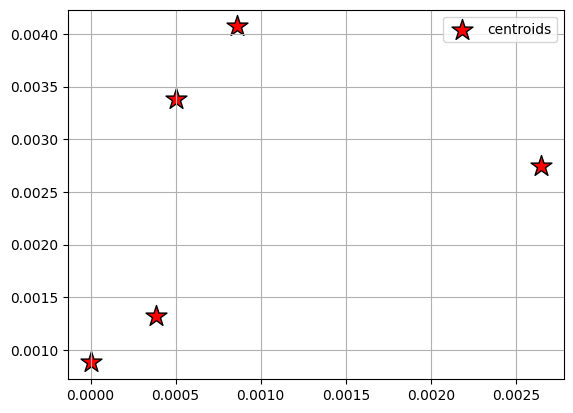

In [83]:
# I can see some weird situations... someone gave a score of 1, but the sentiment was positive, and when I read it
# it was also informative and sounded good. Maybe the cluster is properly grouping good comments?


km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

# reviews_df['cluster'] = y_km



plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [93]:
# LDA

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


# Define Search Param
search_params = {'n_components': [5,7,10], 'learning_decay': [.5]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs=-1)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(estimator=LatentDirichletAllocation(n_jobs=-1),
             param_grid={'learning_decay': [0.5], 'n_components': [5, 7, 10]})

In [94]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -15917528.101022517
Model Perplexity:  374.17046159688374


In [111]:

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

        
lda = LatentDirichletAllocation(n_components=5,n_jobs=-1,
                                max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
     

/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
display_topics(lda, tf_feature_names, 20)

Topic 0:
game play fix app update phone download time account im data problem cat wont screen lost error start playing help
Topic 1:
game love best great gam played mobile amazing ive games play far final rpg fantasy playing im fan like worth
Topic 2:
game cards yugioh dont make like money star duel need bad think add deck want im better got spend people
Topic 3:
game good fun great play really like awesome gam pay free graphics cool easy time win pretty old real story
Topic 4:
game card fun nice characters really playing new hard enjoy story like bit pvp monsters games cats lot play monster


In [113]:
reviews_df['title'].unique()

array(['Arknights', 'Azur Lane', 'Fate/Grand Order (English)',
       'Disney Twisted-Wonderland', 'DRAGON BALL LEGENDS',
       'MY HERO ULTRA IMPACT', 'ONE PIECE Bounty Rush',
       'SLIME - ISEKAI Memories', 'DRAGON BALL Z DOKKAN BATTLE',
       'Summoners War', 'Princess Connect! Re: Dive',
       'Pokémon Masters EX', 'Idle Heroes', 'Guardian Tales', 'AFK Arena',
       'Genshin Impact', 'Honkai Impact 3rd', 'ONE PIECE TREASURE CRUISE',
       'Identity V', 'MARVEL Future Fight', 'The Seven Deadly Sins',
       'MapleStory M - Fantasy MMORPG', 'Fire Emblem Heroes',
       'Mario Kart Tour', 'RAID: Shadow Legends',
       'HATSUNE MIKU: COLORFUL STAGE!', 'DISSIDIA FINAL FANTASY OO',
       'FINAL FANTASY  BRAVE EXVIUS', 'FFBE WAR OF THE VISIONS',
       'Epic Seven', 'Evertale', 'ANOTHER EDEN Global', 'The Battle Cats',
       'Puzzle & Dragons', 'Yu-Gi-Oh! Duel Links',
       'Yu-Gi-Oh! Master Duel'], dtype=object)

In [114]:
lda.components_.shape


(5, 1000)

In [115]:
W = lda.transform(tf)

In [116]:
W.shape

(1503346, 5)

In [117]:
W[0]

array([0.04      , 0.04060681, 0.04      , 0.46011462, 0.41927857])

In [118]:
W[0:5]

array([[0.04      , 0.04060681, 0.04      , 0.46011462, 0.41927857],
       [0.06822041, 0.06877752, 0.06690384, 0.72863786, 0.06746037],
       [0.01602537, 0.33155003, 0.09727487, 0.01546336, 0.53968637],
       [0.07452397, 0.00777821, 0.75568508, 0.00776125, 0.15425149],
       [0.04      , 0.24000052, 0.04      , 0.29652746, 0.38347202]])